In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored

In [22]:
def count_plot(x, hue, m, data,timon):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(121)
    ax = sns.countplot(x = x, hue=hue, data=data, palette="Set1")
    ax.set_title(f'Diagrama de barras {m}', size=12)
    ax.set_ylabel('Observaciones', size=12)
    ax.set_xlabel(x,size=12)
    ax = plt.subplot(122)
    ax = mosaic(timon, title= f'Diagrama de mosaico {m}', ax=ax)   

In [72]:
def graf_plot(X,y,v1,v2):
    plt.figure(figsize=(18,5))
    ax = plt.subplot(131)
    ax.set_title(f'Histograma {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], bins=10, kde= False, label= v1, color='orange')
    ax = sns.distplot(data[data[y] == v2][X], bins=10, kde= False, label= v2, color='b')
    ax.axvline(data[data[y] == v1][X].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[data[y] == v1][X].median(), c='black', linestyle = '--', label = 'Mediana')
    ax.set_ylabel('Observaciones', size=12)
    ax.legend()
    
    ax = plt.subplot(132)
    ax.set_title(f'Densidad {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], hist = False, bins=10, label = v1,color='orange')
    ax = sns.distplot(data[data[y] == v2][X], hist = False, bins=10, label = v2,color='b')
    ax.axvline(data[data[y] == v1][X].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[data[y] == v1][X].median(), c='black', linestyle = '--', label = 'Mediana')
    ax.legend()
    
    ax = plt.subplot(133)
    ax.set_title(f'Diagrama de cajas {X} vs {y}')
    ax = sns.boxplot(data = data, x=X, y=y)

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)

In [24]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./Data_No_Identificada_Tratada.csv')
data.head()

Cargamos los datos


Netflows First_Protocol Second_Protocol Third_Protocol  p1_d   p2_d  \
0         5           ICMP             NaN            NaN   0.0  0.000   
1        16            UDP           ICMP6            NaN   0.0  3.002   
2        20          ICMP6             NaN            NaN   0.0  0.000   
3       315            TCP             UDP            NaN   0.0  0.001   
4        17          ICMP6             NaN            NaN   0.0  0.000   

     p3_d  duration    max_d  min_d  ...  p3_ip  p1_ib  p2_ib  p3_ib  \
0   0.000     0.000    0.000    0.0  ...    1.0  40.00  286.0  286.0   
1   9.474   300.933  116.215    0.0  ...    4.0  41.75  563.5  688.0   
2   0.000     0.000    0.000    0.0  ...    1.0  32.00   32.0   32.0   
3  45.779  9668.430  149.574    0.0  ...    6.0  32.00   96.0  248.0   
4   0.000     0.000    0.000    0.0  ...    1.0  32.00   32.0   32.0   

       Type  Cryptocurrency  second_sp  second_dp  third_sp  third_dp  
0      mine    Unclassified       5353       1281     45560      5353  
1      mine    Unclassified          0       5353     34879     34560  
2      mine    Unclassified       5353      34304     45560      5353  
3  not_mine   Does_not_have         80         80     53890     53890  
4      mine    Unclassified       5353      34304     45560      5353  

[5 rows x 31 columns]

In [25]:
data['Second_Protocol'] = data['Second_Protocol'].fillna('Missing')
data['Third_Protocol'] = data['Third_Protocol'].fillna('Missing')

### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categóricas(object) por separado, para hacer una análisis más organizado.

In [26]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

# Inspección datos 

### Variables Categoricas

In [27]:
data_object

['First_Protocol',
 'Second_Protocol',
 'Third_Protocol',
 'Type',
 'Cryptocurrency']

ICMP   UDP  ICMP6   TCP
mine       308  4366  32302    77
not_mine     1   504      1  1995

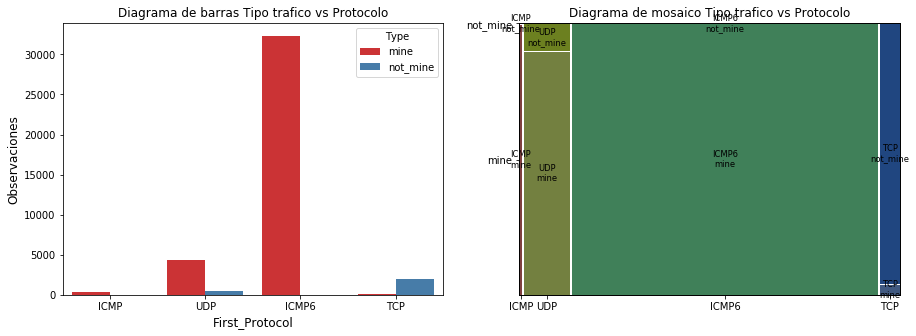

In [28]:
A = 'First_Protocol'
B = 'Type'
m = 'Tipo trafico vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,4), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[0], B, m, data, datas)
display(table_conti)

Missing  ICMP6   UDP   ICMP   TCP
mine         5904   3787  8356  16837  2169
not_mine      229      6  1996      3   267

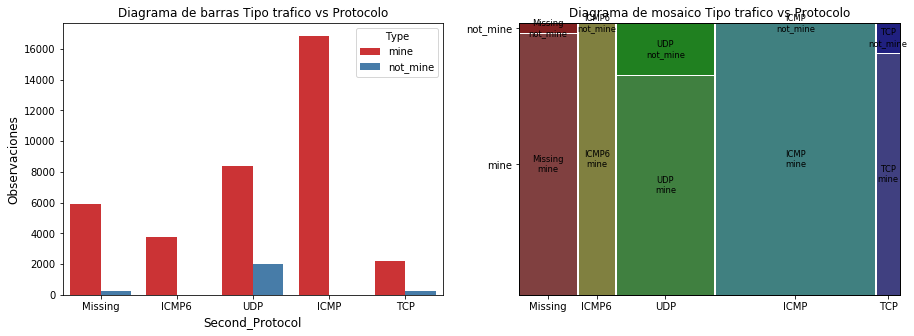

In [29]:
A = 'Second_Protocol'
B = 'Type'
m = 'Tipo trafico vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,5), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[1], B, m, data, datas)
display(table_conti)

Unclassified  Does_not_have
mine             37053              0
not_mine             0           2501

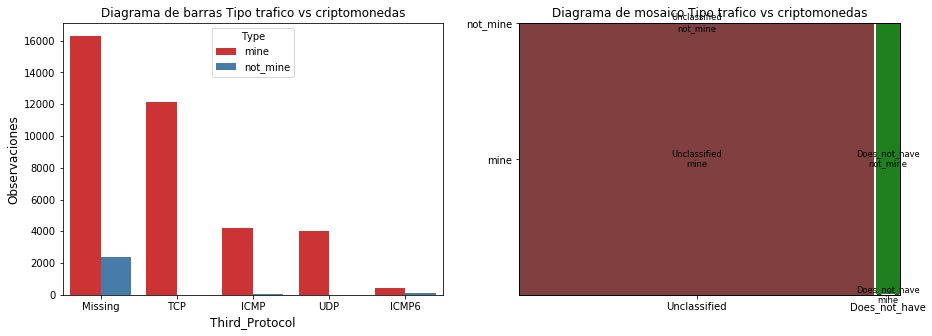

In [30]:
A = 'Cryptocurrency'
B = 'Type'
m = 'Tipo trafico vs criptomonedas'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,2), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[2], B, m, data, datas)
display(table_conti)

In [31]:
A = 'Cryptocurrency'
B = 'First_Protocol'
m = 'Criptomonedas vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(4,2), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[2], B, m, data, datas)
display(table_conti)

Unclassified  Does_not_have
ICMP            308              1
UDP            4366            504
ICMP6         32302              1
TCP              77           1995

### Variables Continuas

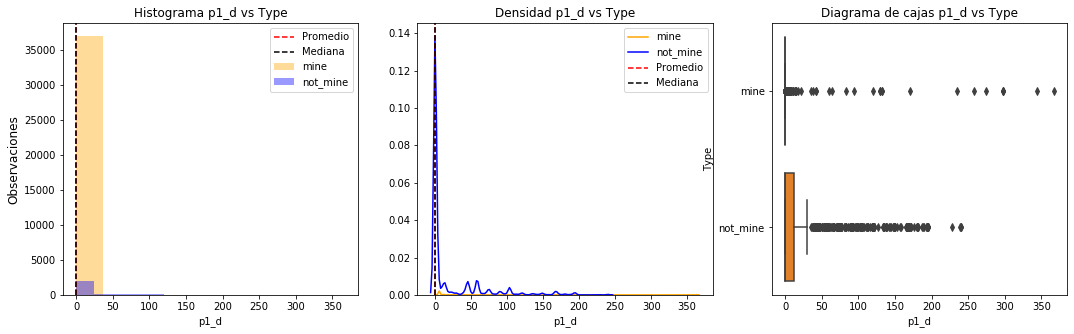

In [73]:
graf_plot(data_numeric_float[0],'Type','mine','not_mine')

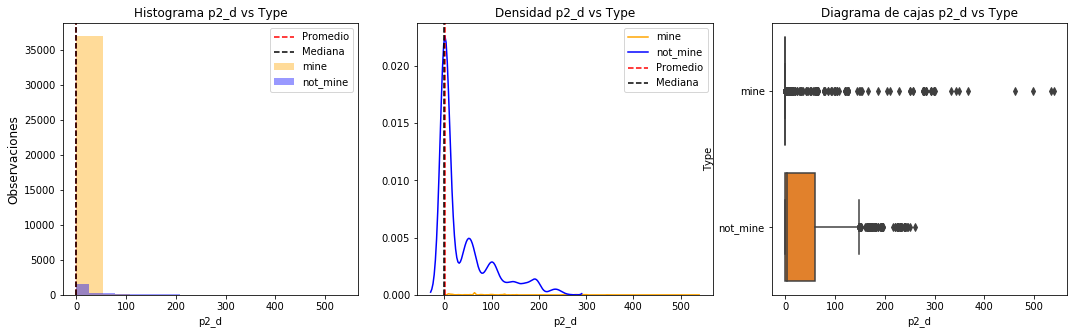

In [66]:
graf_plot(data_numeric_float[1],'Type','mine','not_mine')

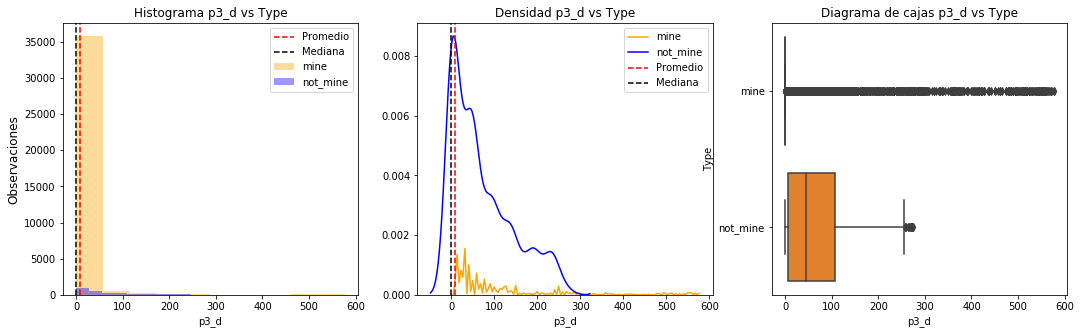

In [67]:
graf_plot(data_numeric_float[2],'Type','mine','not_mine')

In [68]:
graf_plot(data_numeric_float[3],'Type','mine','not_mine')

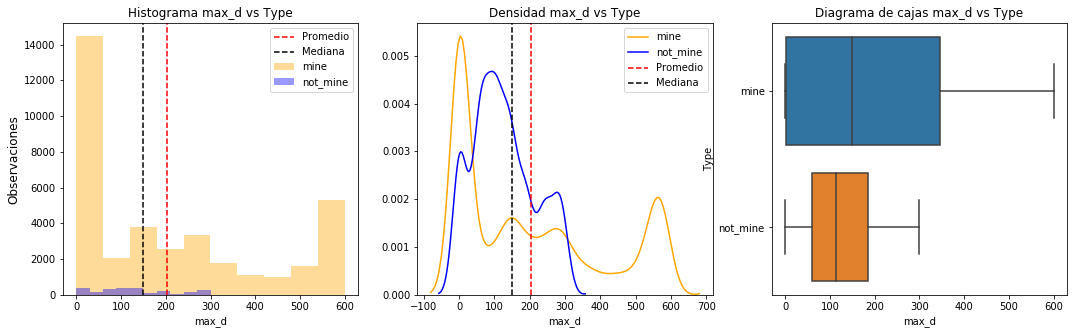

In [69]:
graf_plot(data_numeric_float[4],'Type','mine','not_mine')

In [70]:
graf_plot(data_numeric_float[5],'Type','mine','not_mine')

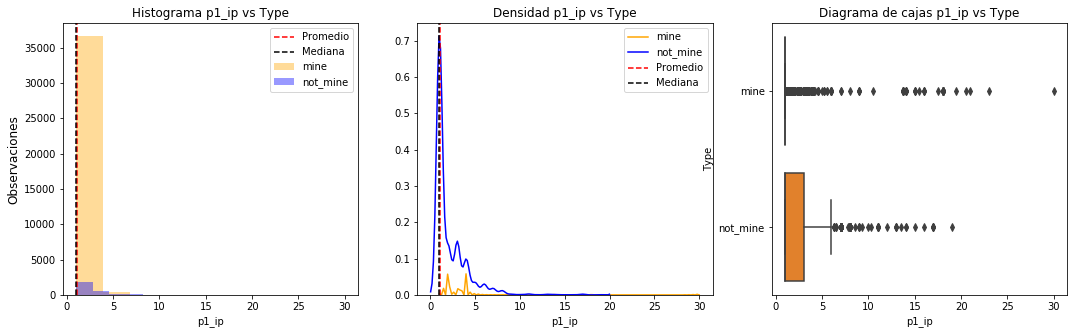

In [109]:
graf_plot(data_numeric_float[6],'Type','mine','not_mine')

In [110]:
graf_plot(data_numeric_float[7],'Type','mine','not_mine')

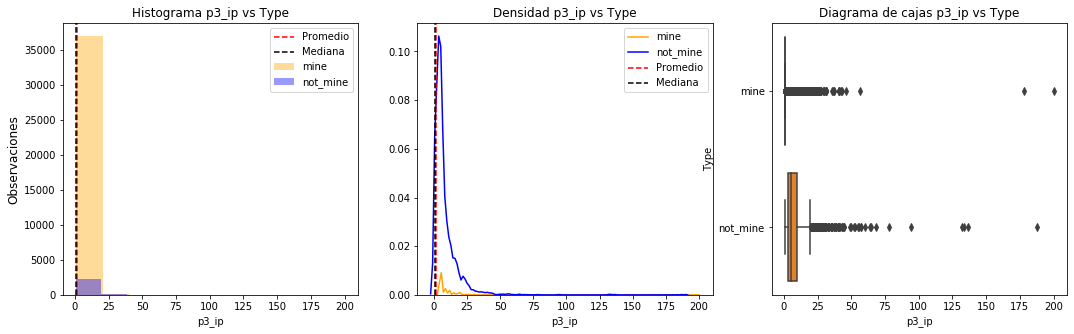

In [111]:
graf_plot(data_numeric_float[8],'Type','mine','not_mine')

In [112]:
graf_plot(data_numeric_float[9],'Type','mine','not_mine')

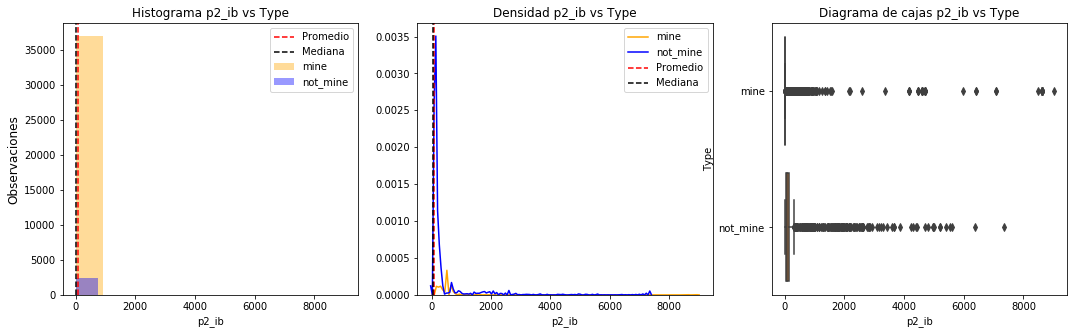

In [113]:
graf_plot(data_numeric_float[10],'Type','mine','not_mine')

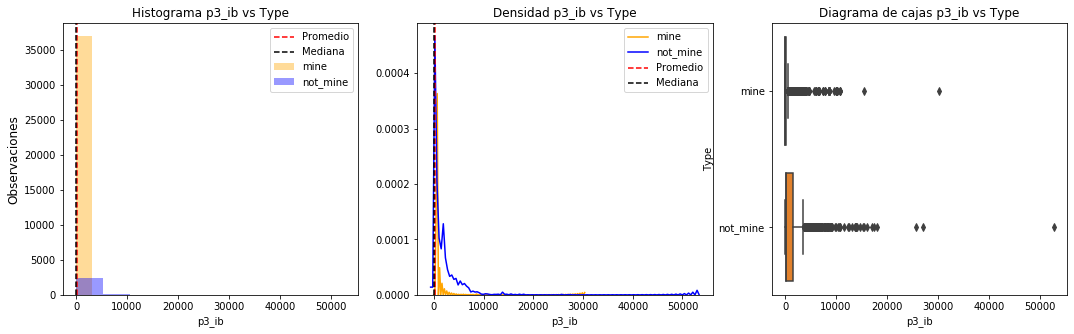

In [114]:
graf_plot(data_numeric_float[11],'Type','mine','not_mine')

### Variables Discretas

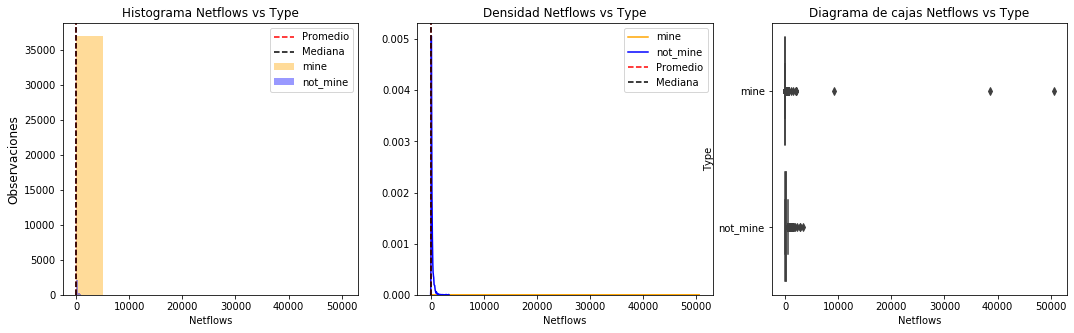

In [116]:
graf_plot(data_numeric_int[0],'Type','mine','not_mine')

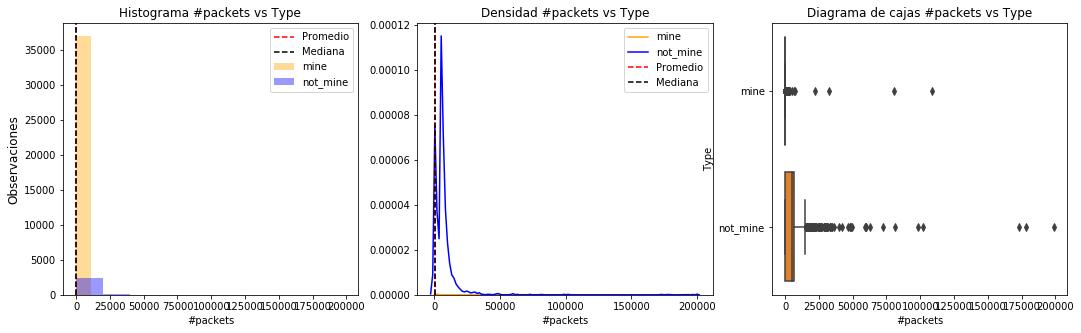

In [115]:
graf_plot(data_numeric_int[1],'Type','mine','not_mine')

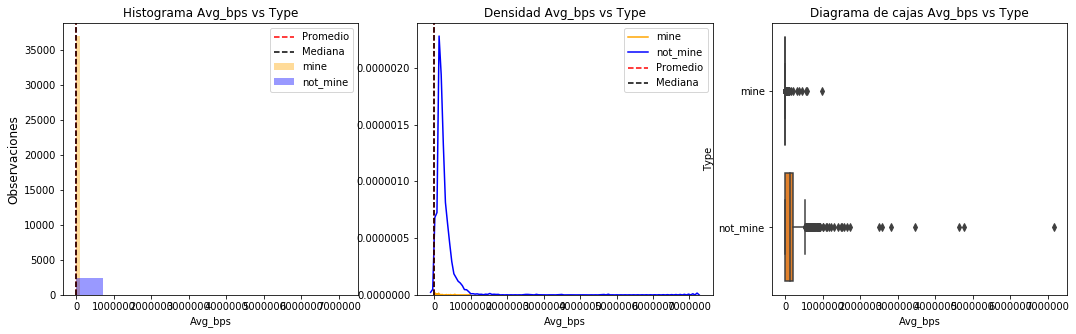

In [117]:
graf_plot(data_numeric_int[2],'Type','mine','not_mine')

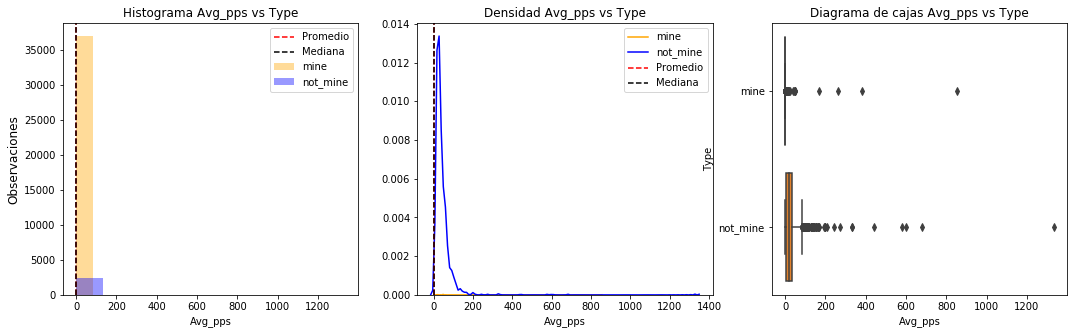

In [118]:
graf_plot(data_numeric_int[3],'Type','mine','not_mine')

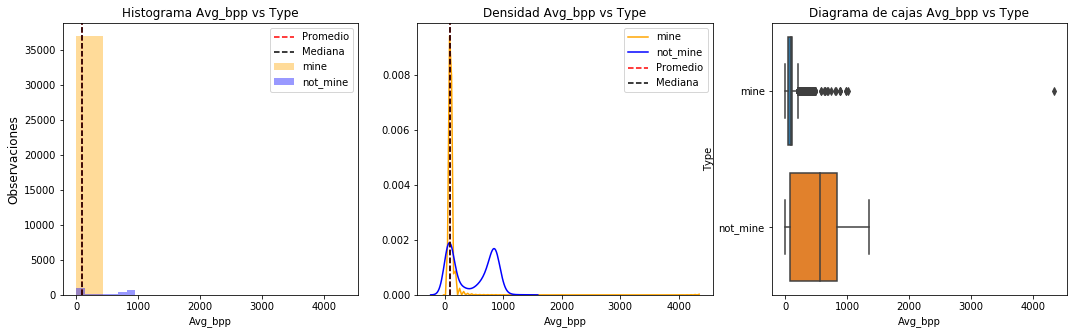

In [119]:
graf_plot(data_numeric_int[4],'Type','mine','not_mine')

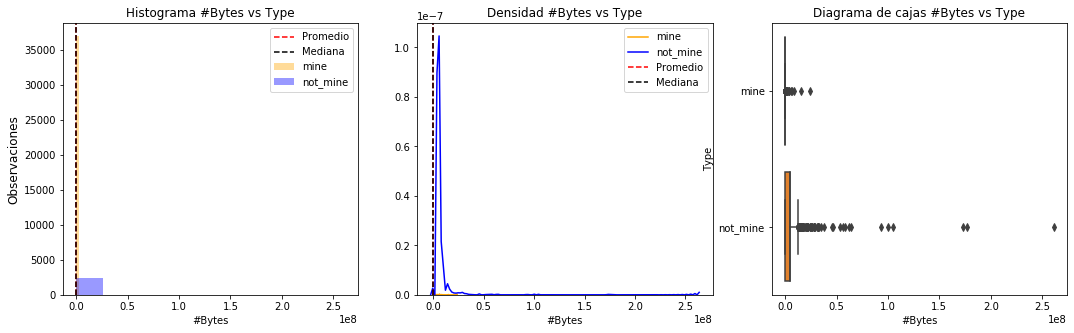

In [120]:
graf_plot(data_numeric_int[5],'Type','mine','not_mine')

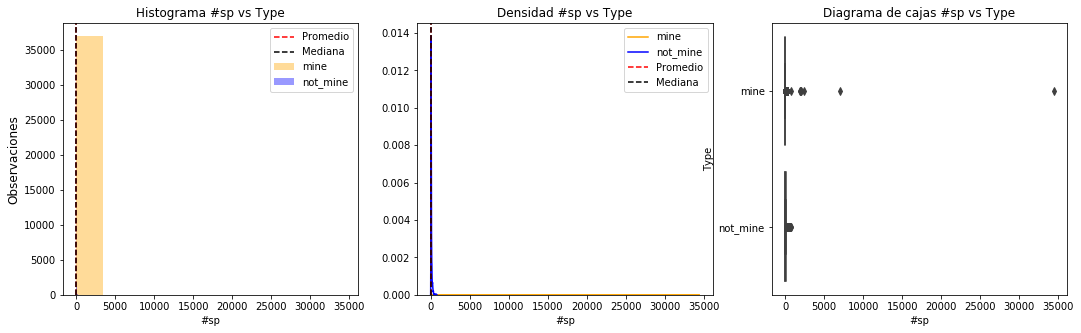

In [121]:
graf_plot(data_numeric_int[6],'Type','mine','not_mine')

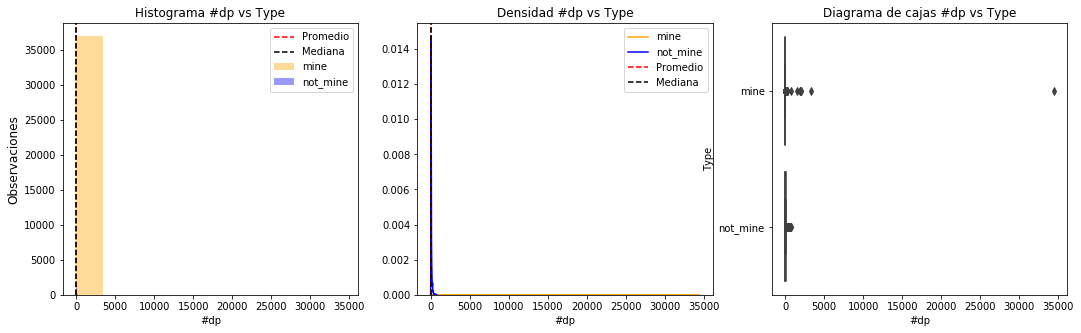

In [122]:
graf_plot(data_numeric_int[7],'Type','mine','not_mine')

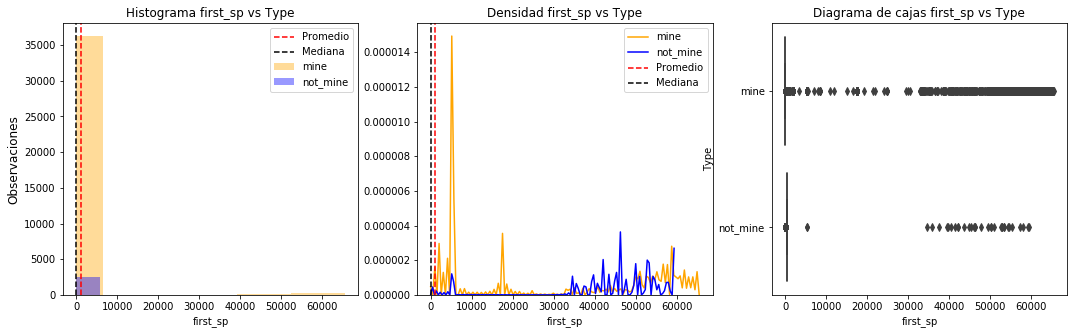

In [123]:
graf_plot(data_numeric_int[8],'Type','mine','not_mine')

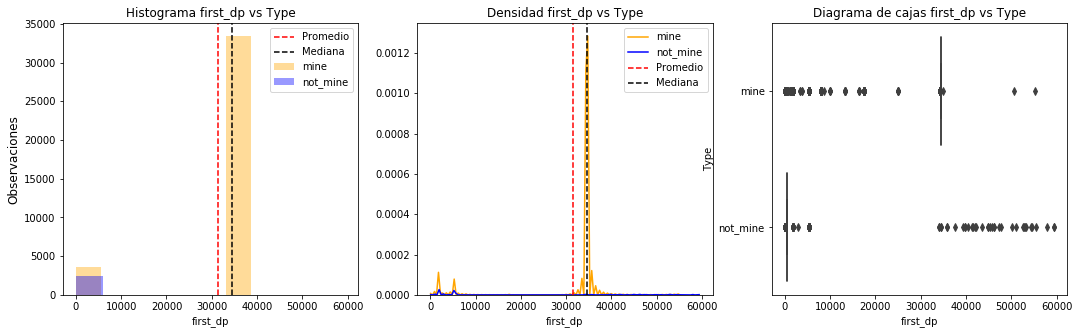

In [124]:
graf_plot(data_numeric_int[9],'Type','mine','not_mine')

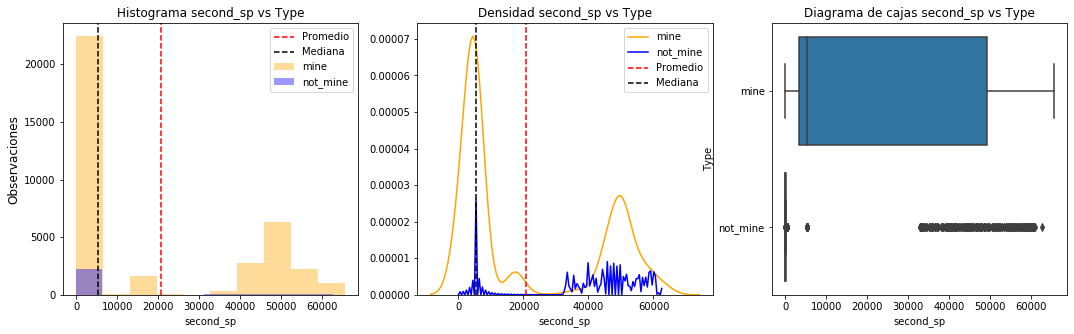

In [125]:
graf_plot(data_numeric_int[10],'Type','mine','not_mine')

In [126]:
graf_plot(data_numeric_int[11],'Type','mine','not_mine')

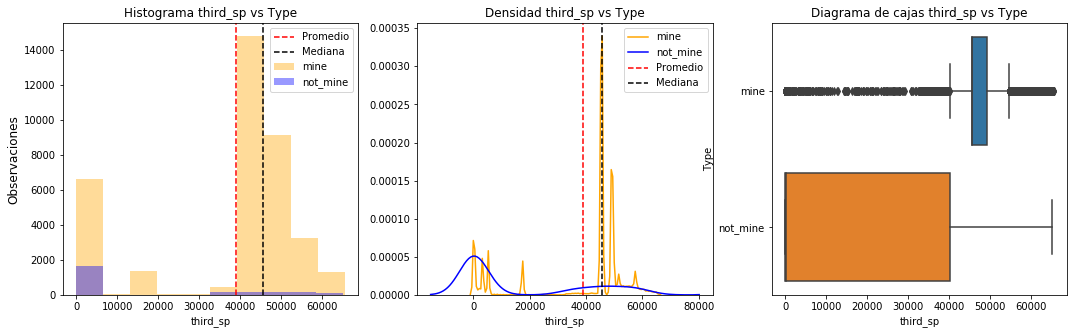

In [127]:
graf_plot(data_numeric_int[12],'Type','mine','not_mine')

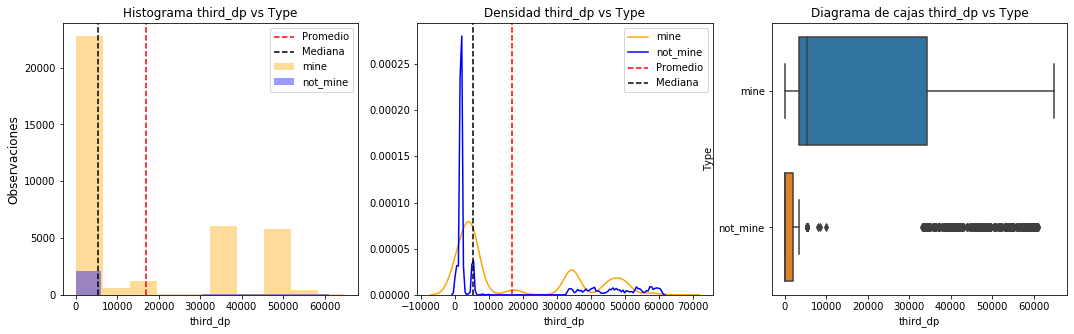

In [128]:
graf_plot(data_numeric_int[13],'Type','mine','not_mine')

In [59]:
data_n = pd.concat([data[data_numeric_float], data[data_numeric_int], data['Type']], axis = 1)
data_n.columns

Index(['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'p1_ip', 'p2_ip',
       'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib', 'Netflows', '#packets', 'Avg_bps',
       'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'first_dp',
       'second_sp', 'second_dp', 'third_sp', 'third_dp', 'Type'],
      dtype='object')

In [60]:
sns.pairplot(data_n)

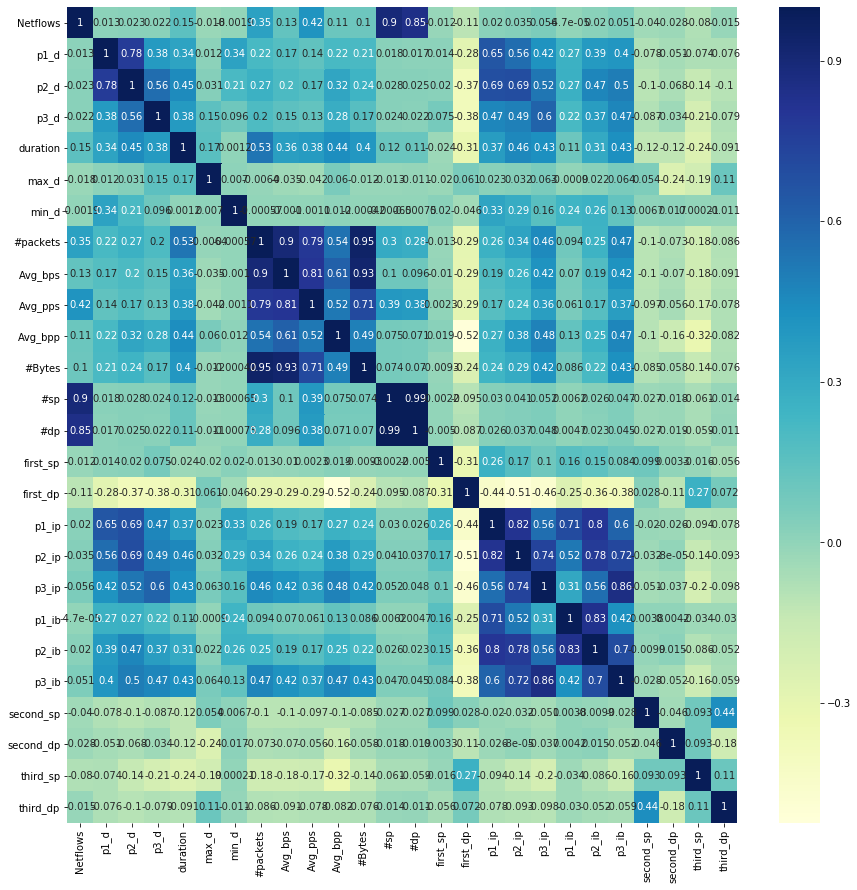

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")